In [54]:
import torch
from torchvision import transforms, datasets, utils
import matplotlib.pyplot as plt
import random

In [62]:
class RandomRotation90(object):
    def __call__(self, image):
        angle = random.choice([0, 90, 180, 270])
        return transforms.functional.rotate(image, angle)
        

data_transform = transforms.Compose([
        transforms.Resize(128),
        transforms.CenterCrop(128),
        RandomRotation90(),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406],
        #                     std=[0.229, 0.224, 0.225])
    ])
landmark_dataset = datasets.ImageFolder(root='/home/kylecshan/data/images/train_ms/',
                                           transform=data_transform)
num_total = len(landmark_dataset)
num_test = 1000
num_train = int((num_total - num_test) * 0.9)
num_val = num_total - num_test - num_train

test_dataset, train_dataset, val_dataset = torch.utils.data.random_split(landmark_dataset,
                                                                         (num_test, num_train, num_val))

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=4, shuffle=True,
                                           num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=4, shuffle=True,
                                          num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset,
                                         batch_size=4, shuffle=True,
                                         num_workers=4)

In [63]:
print('train: %d, val: %d, test: %d' % (num_train, num_val, num_test))

train: 110467, val: 12275, test: 1000


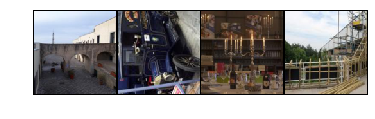

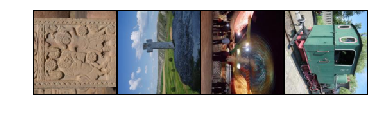

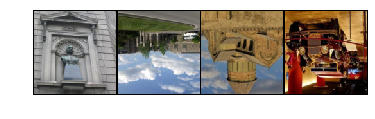

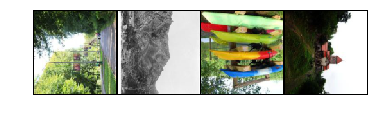

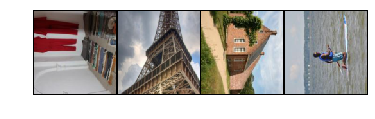

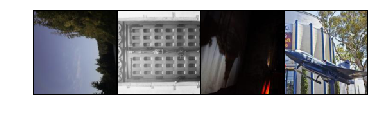

In [69]:
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, _ = sample_batched
    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

for i_batch, sample_batched in enumerate(train_loader):
    if i_batch <= 5:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
    else:
        break